# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [42]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [43]:
clean_city_list = []
max_temp_list = []
humidity_list = []
cloudiness_list = []
wind_speed_list = []
country_list = []
date_list = []
lat_list = []
lng_list = []
index_count = 1
index_max = 50
set_count = 1

print('Beginning Data Retrieval')
print('----------------------------------------')

for index, city in enumerate(cities, start = 1):
    
    base_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'
    
    try: 
        weather_json = requests.get(base_url).json()
        max_temp_list.append(weather_json['main']['temp_max'])
        humidity_list.append(weather_json['main']['humidity'])
        cloudiness_list.append(weather_json['clouds']['all'])
        wind_speed_list.append(weather_json['wind']['speed'])
        country_list.append(weather_json['sys']['country'])
        date_list.append(weather_json['dt'])
        clean_city_list.append(city)
        lat_list.append(weather_json['coord']['lat'])
        lng_list.append(weather_json['coord']['lon'])
        print(f'Processing record {index_count} of Set {set_count} | {city}')
        index_count = index_count + 1
        if index_count > index_max:
            index_count = 1
            set_count = set_count + 1
            
    except:
        print('City not found. Skipping...')

print('----------------------------------------')
print('Data Retrieval Complete')
print('----------------------------------------')

Beginning Data Retrieval
----------------------------------------
Processing record 1 of Set 1 | katsuura
Processing record 2 of Set 1 | rikitea
Processing record 3 of Set 1 | yar-sale
Processing record 4 of Set 1 | puerto ayora
Processing record 5 of Set 1 | awjilah
Processing record 6 of Set 1 | punta arenas
Processing record 7 of Set 1 | mataura
Processing record 8 of Set 1 | cidreira
Processing record 9 of Set 1 | bambous virieux
Processing record 10 of Set 1 | arraial do cabo
City not found. Skipping...
Processing record 11 of Set 1 | thompson
City not found. Skipping...
Processing record 12 of Set 1 | lavrentiya
Processing record 13 of Set 1 | pozo colorado
Processing record 14 of Set 1 | naze
Processing record 15 of Set 1 | hermanus
Processing record 16 of Set 1 | cherskiy
Processing record 17 of Set 1 | ust-ishim
Processing record 18 of Set 1 | tommot
Processing record 19 of Set 1 | kaitangata
Processing record 20 of Set 1 | nikolskoye
Processing record 21 of Set 1 | ixtapa
Cit

Processing record 35 of Set 4 | isangel
Processing record 36 of Set 4 | foz do iguacu
Processing record 37 of Set 4 | kodinsk
Processing record 38 of Set 4 | bilibino
Processing record 39 of Set 4 | shashi
Processing record 40 of Set 4 | ucluelet
Processing record 41 of Set 4 | chumikan
Processing record 42 of Set 4 | yellowknife
Processing record 43 of Set 4 | hobyo
Processing record 44 of Set 4 | beroroha
City not found. Skipping...
Processing record 45 of Set 4 | flinders
Processing record 46 of Set 4 | aklavik
City not found. Skipping...
Processing record 47 of Set 4 | lebu
Processing record 48 of Set 4 | bjerkvik
City not found. Skipping...
Processing record 49 of Set 4 | guerrero negro
Processing record 50 of Set 4 | vieira de leiria
Processing record 1 of Set 5 | khandbari
Processing record 2 of Set 5 | qasigiannguit
City not found. Skipping...
Processing record 3 of Set 5 | paamiut
Processing record 4 of Set 5 | lubango
Processing record 5 of Set 5 | kondagaon
Processing record

Processing record 23 of Set 8 | el alto
Processing record 24 of Set 8 | sao miguel do araguaia
Processing record 25 of Set 8 | langres
Processing record 26 of Set 8 | palauig
Processing record 27 of Set 8 | soanierana ivongo
Processing record 28 of Set 8 | nokaneng
City not found. Skipping...
Processing record 29 of Set 8 | pangnirtung
Processing record 30 of Set 8 | peru
Processing record 31 of Set 8 | sisimiut
Processing record 32 of Set 8 | vestmannaeyjar
Processing record 33 of Set 8 | pacific grove
Processing record 34 of Set 8 | la asuncion
Processing record 35 of Set 8 | chifeng
City not found. Skipping...
City not found. Skipping...
Processing record 36 of Set 8 | port hedland
Processing record 37 of Set 8 | ginir
Processing record 38 of Set 8 | nanga eboko
Processing record 39 of Set 8 | lipari
Processing record 40 of Set 8 | saint-pierre
Processing record 41 of Set 8 | wanganui
Processing record 42 of Set 8 | bang bo
Processing record 43 of Set 8 | sioux lookout
Processing re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [44]:
city_data = pd.DataFrame({'City': clean_city_list,
                         'Lat': lat_list,
                          'Lng': lng_list,
                          'Max Temp': max_temp_list,
                          'Humidity': humidity_list,
                          'Cloudiness': cloudiness_list,
                          'Wind Speed': wind_speed_list,
                          'Country': country_list,
                          'Date': date_list})
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,katsuura,35.1333,140.3000,298.84,88,98,6.84,JP,1624158960
1,rikitea,-23.1203,-134.9692,297.23,75,2,7.90,PF,1624158961
2,yar-sale,66.8333,70.8333,285.21,54,94,5.68,RU,1624158961
3,puerto ayora,-0.7393,-90.3518,296.23,90,87,2.68,EC,1624158962
4,awjilah,29.1081,21.2869,295.03,50,0,3.71,LY,1624158962


In [46]:
city_data.to_csv(output_data_file)

In [47]:
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,5.440000e+02
mean,18.880535,19.503434,293.158824,70.229779,57.808824,3.361820,1.624159e+09
std,33.588134,89.896626,7.812406,21.772060,39.061837,2.226188,1.027769e+02
min,-54.800000,-175.200000,271.180000,8.000000,0.000000,0.000000,1.624158e+09
25%,-8.780925,-56.505550,287.857500,58.000000,18.000000,1.620000,1.624159e+09
50%,21.452950,22.527450,294.080000,76.000000,74.000000,2.980000,1.624159e+09
75%,47.846500,101.931900,299.142500,87.000000,97.000000,4.632500,1.624159e+09
max,78.218600,178.416700,312.480000,100.000000,100.000000,14.610000,1.624159e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [48]:
#  Get the indices of cities that have humidity over 100%.
humidity_index = city_data.index[city_data['Humidity'] > 100]
humidity_index

Int64Index([], dtype='int64')

In [49]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data.drop(index = humidity_index, inplace = False)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,katsuura,35.1333,140.3000,298.84,88,98,6.84,JP,1624158960
1,rikitea,-23.1203,-134.9692,297.23,75,2,7.90,PF,1624158961
2,yar-sale,66.8333,70.8333,285.21,54,94,5.68,RU,1624158961
3,puerto ayora,-0.7393,-90.3518,296.23,90,87,2.68,EC,1624158962
4,awjilah,29.1081,21.2869,295.03,50,0,3.71,LY,1624158962
...,...,...,...,...,...,...,...,...,...
539,tarauaca,-8.1614,-70.7656,295.75,86,84,1.05,BR,1624159084
540,agua prieta,31.3000,-109.5667,308.04,14,37,1.72,MX,1624159244
541,san juan,-31.5375,-68.5364,279.22,60,0,2.48,AR,1624159244
542,ola,59.5833,151.2833,286.10,65,90,3.07,RU,1624159245


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

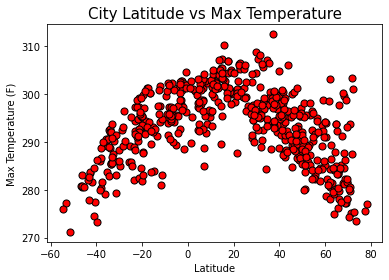

In [50]:
lat_plot = clean_city_data.plot(kind = 'scatter', x = 'Lat', y = 'Max Temp', color = 'red', edgecolor = 'black', s = 50)
plt.title('City Latitude vs Max Temperature', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('scatter_plots/cities_temp_lat.png')

## Latitude vs. Humidity Plot

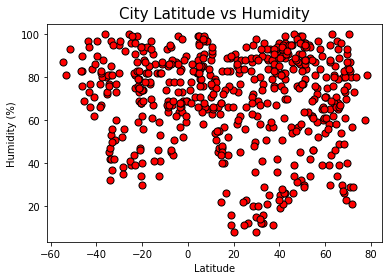

In [51]:
lat_plot = clean_city_data.plot(kind = 'scatter', x = 'Lat', y = 'Humidity', color = 'red', edgecolor = 'black', s = 50)
plt.title('City Latitude vs Humidity', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('scatter_plots/cities_humid_lat.png')

## Latitude vs. Cloudiness Plot

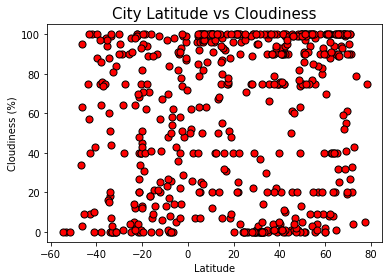

In [52]:
lat_plot = clean_city_data.plot(kind = 'scatter', x = 'Lat', y = 'Cloudiness', color = 'red', edgecolor = 'black', s = 50)
plt.title('City Latitude vs Cloudiness', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('scatter_plots/cities_cloud_lat.png')

## Latitude vs. Wind Speed Plot

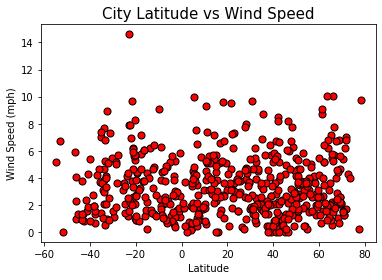

In [53]:
lat_plot = clean_city_data.plot(kind = 'scatter', x = 'Lat', y = 'Wind Speed', color = 'red', edgecolor = 'black', s = 50)
plt.title('City Latitude vs Wind Speed', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('scatter_plots/cities_wind_lat.png')

## Linear Regression

In [54]:
#Create Dataframes for northern and southern hemisphere cities
north_hemi = clean_city_data.loc[clean_city_data['Lat'] > 0]
south_hemi = clean_city_data.loc[clean_city_data['Lat'] < 0]
south_hemi = south_hemi.reset_index(drop = True)
north_hemi = north_hemi.reset_index(drop = True)

In [55]:
south_hemi.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,297.23,75,2,7.90,PF,1624158961
1,puerto ayora,-0.7393,-90.3518,296.23,90,87,2.68,EC,1624158962
2,punta arenas,-53.1500,-70.9167,277.21,81,0,6.69,CL,1624158963
3,mataura,-46.1927,168.8643,280.64,83,63,2.28,NZ,1624158963
4,cidreira,-30.1811,-50.2056,288.22,95,100,5.48,BR,1624158964


In [56]:
north_hemi.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,katsuura,35.1333,140.3000,298.84,88,98,6.84,JP,1624158960
1,yar-sale,66.8333,70.8333,285.21,54,94,5.68,RU,1624158961
2,awjilah,29.1081,21.2869,295.03,50,0,3.71,LY,1624158962
3,thompson,55.7435,-97.8558,282.24,87,75,3.09,CA,1624158965
4,lavrentiya,65.5833,-171.0000,283.49,65,89,2.19,RU,1624158967


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is 0.469300991391374


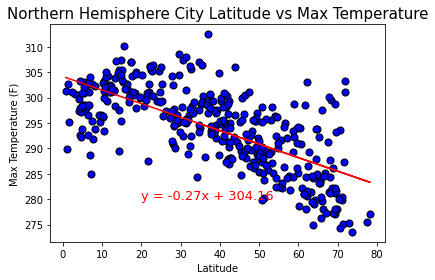

In [57]:
x_values = north_hemi['Lat']
y_values = north_hemi['Max Temp']

slope, intercept, r, p, se = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-squared value is {r**2}')

nh_plot = north_hemi.plot(kind = 'scatter', x = 'Lat', y = 'Max Temp',color = 'blue', edgecolor = 'black', s = 50)
plt.plot(x_values, regression_values,'r-')
plt.annotate(line_eq, (20,280), fontsize=13, color = 'r')
plt.title('Northern Hemisphere City Latitude vs Max Temperature', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('scatter_plots/nh_temp_lat.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is 0.571076747356467


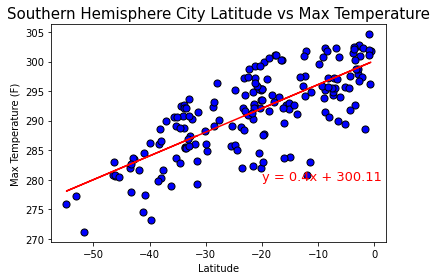

In [58]:
x_values = south_hemi['Lat']
y_values = south_hemi['Max Temp']

slope, intercept, r, p, se = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-squared value is {r**2}')

nh_plot = south_hemi.plot(kind = 'scatter', x = 'Lat', y = 'Max Temp',color = 'blue', edgecolor = 'black', s = 50)
plt.plot(x_values, regression_values,'r-')
plt.annotate(line_eq, (-20,280), fontsize=13, color = 'r')
plt.title('Southern Hemisphere City Latitude vs Max Temperature', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('scatter_plots/sh_temp_lat.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 0.0019760388634201334


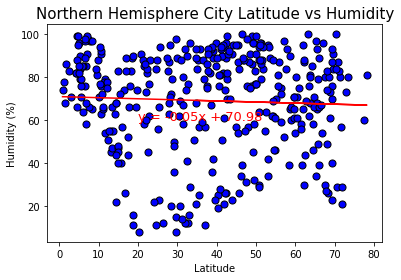

In [59]:
x_values = north_hemi['Lat']
y_values = north_hemi['Humidity']

slope, intercept, r, p, se = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-squared value is {r**2}')

nh_plot = north_hemi.plot(kind = 'scatter', x = 'Lat', y = 'Humidity',color = 'blue', edgecolor = 'black', s = 50)
plt.plot(x_values, regression_values,'r-')
plt.annotate(line_eq, (20,60), fontsize=13, color = 'r')
plt.title('Northern Hemisphere City Latitude vs Humidity', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('scatter_plots/nh_humid_lat.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 0.005182440402847313


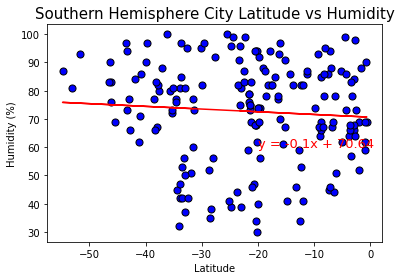

In [60]:
x_values = south_hemi['Lat']
y_values = south_hemi['Humidity']

slope, intercept, r, p, se = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-squared value is {r**2}')

nh_plot = south_hemi.plot(kind = 'scatter', x = 'Lat', y = 'Humidity',color = 'blue', edgecolor = 'black', s = 50)
plt.plot(x_values, regression_values,'r-')
plt.annotate(line_eq, (-20,60), fontsize=13, color = 'r')
plt.title('Southern Hemisphere City Latitude vs Humidity', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('scatter_plots/sh_humid_lat.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is 0.0012793526091205785


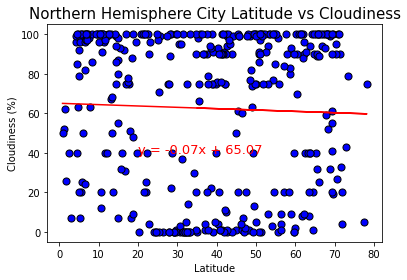

In [61]:
x_values = north_hemi['Lat']
y_values = north_hemi['Cloudiness']

slope, intercept, r, p, se = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-squared value is {r**2}')

nh_plot = north_hemi.plot(kind = 'scatter', x = 'Lat', y = 'Cloudiness',color = 'blue', edgecolor = 'black', s = 50)
plt.plot(x_values, regression_values,'r-')
plt.annotate(line_eq, (20,40), fontsize=13, color = 'r')
plt.title('Northern Hemisphere City Latitude vs Cloudiness', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('scatter_plots/nh_cloud_lat.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is 0.0034490118531752935


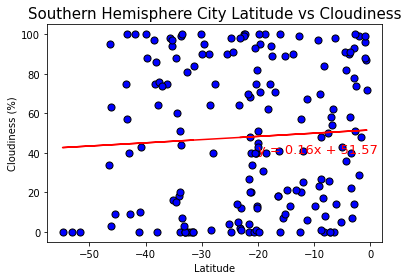

In [62]:
x_values = south_hemi['Lat']
y_values = south_hemi['Cloudiness']

slope, intercept, r, p, se = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-squared value is {r**2}')

nh_plot = south_hemi.plot(kind = 'scatter', x = 'Lat', y = 'Cloudiness',color = 'blue', edgecolor = 'black', s = 50)
plt.plot(x_values, regression_values,'r-')
plt.annotate(line_eq, (-20,40), fontsize=13, color = 'r')
plt.title('Southern Hemisphere City Latitude vs Cloudiness', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('scatter_plots/sh_cloud_lat.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is 0.0011683501037174037


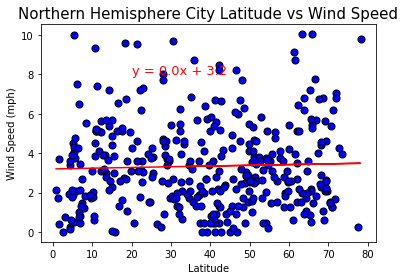

In [63]:
x_values = north_hemi['Lat']
y_values = north_hemi['Wind Speed']

slope, intercept, r, p, se = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-squared value is {r**2}')

nh_plot = north_hemi.plot(kind = 'scatter', x = 'Lat', y = 'Wind Speed',color = 'blue', edgecolor = 'black', s = 50)
plt.plot(x_values, regression_values,'r-')
plt.annotate(line_eq, (20,8), fontsize=13, color = 'r')
plt.title('Northern Hemisphere City Latitude vs Wind Speed', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('scatter_plots/nh_wind_lat.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is 0.004390283685765088


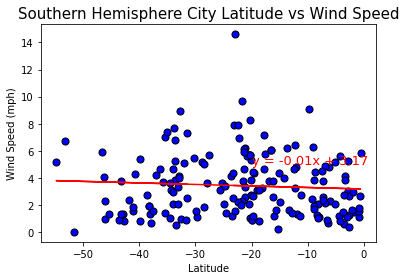

In [64]:
x_values = south_hemi['Lat']
y_values = south_hemi['Wind Speed']

slope, intercept, r, p, se = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-squared value is {r**2}')

nh_plot = south_hemi.plot(kind = 'scatter', x = 'Lat', y = 'Wind Speed',color = 'blue', edgecolor = 'black', s = 50)
plt.plot(x_values, regression_values,'r-')
plt.annotate(line_eq, (-20,5), fontsize=13, color = 'r')
plt.title('Southern Hemisphere City Latitude vs Wind Speed', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('scatter_plots/sh_wind_lat.png')